In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.integrate import odeint
from scipy import signal
import scipy
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn import linear_model
from sklearn import neural_network
from sklearn import preprocessing
from sklearn import model_selection

In [3]:
# Load the data
data = pd.read_csv('SolarPower3.csv')
print(data.head())

   AMBIENT_TEMPERATURE  HOUR  AC_POWER
0            25.184316  0.00       0.0
1            25.084589  0.25       0.0
2            24.935753  0.50       0.0
3            24.846130  0.75       0.0
4            24.621525  1.00       0.0


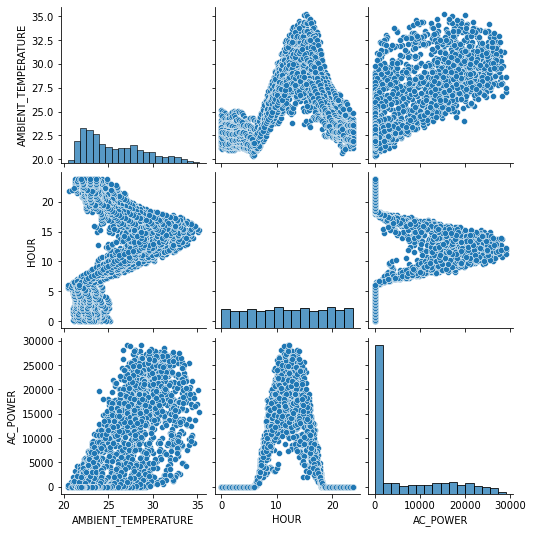

In [4]:
sns.pairplot(data) #visualizing the relationship between variables.

In [5]:
#Creating a train-test split

X = data.copy()
X.drop(['AC_POWER'],axis = 1, inplace = True)
y = data['AC_POWER'].copy()

#creating the training and test data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = 0.3) 

print(np.shape(X_train), np.shape(X_test), np.shape(y_train), np.shape(y_test))

(2209, 2) (948, 2) (2209,) (948,)


In [6]:
#Cross validation to optimize the number of layers


for layers in [3,5,10,20,50,100,200]:
    
    network = neural_network.MLPRegressor(hidden_layer_sizes = (layers,),max_iter = 5000)
    score = model_selection.cross_val_score(network,X_train,y_train,cv = 5,n_jobs = -1, scoring = 'r2')
    
    print('for a layer size of {}, the r^2 value of he training data is {}'.format(layers,score.mean()))
    

for a layer size of 3, the r^2 value of he training data is 0.1545273351535278
for a layer size of 5, the r^2 value of he training data is 0.12043297431526681
for a layer size of 10, the r^2 value of he training data is 0.7055096366324592
for a layer size of 20, the r^2 value of he training data is 0.7193254622545597
for a layer size of 50, the r^2 value of he training data is 0.7324163652176334
for a layer size of 100, the r^2 value of he training data is 0.731673325215197
for a layer size of 200, the r^2 value of he training data is 0.7832015676892492


In [7]:
#function to calculate the r^2 values

def c:
    nat_sq_error = ((y - y.mean())**2).sum() #natural square error
    fit_sq_error = ((y - y_fit)**2).sum() # fit squared error
    R2 = 1 - fit_sq_error/nat_sq_error 
    return R2

In [13]:
#Note the r^2 value does not change much between a layer size of 50 and 100.
#Therefore for speed reasons a layer size of 50 might be a good option.

#For maxmium accuracy a layer size of 200 should be used as the r^2 value was almost 0.8


#Testing a layer size of 50:

network = neural_network.MLPRegressor(hidden_layer_sizes = (50,), max_iter = 5000)
network.fit(X_train,y_train)

ytrain_fit = network.predict(X_train) # fitted Y values for the training data

ytest_fit  = network.predict(X_test) # fitted Y values for the test data


r2_train = calculate_r2(y_train, ytrain_fit) #calculating the r^2 value for the network using the training data.

r2_test = calculate_r2(y_test,ytest_fit) #calucalting the r^2 value for the network using the test data.

print("The r^2 value for the training data is {:.2f} and {:.2f} for the test data.".format(r2_train,r2_test))


print('\n The r^2 value for the data set is virtually the same between the training and test data')

print(' indicating no overfitting to the training.\n')

print('However, it should be noted that the model is only about 70% accurate with a hidden layer size of 50.')




The r^2 value for the training data is 0.72 and 0.73 for the test data.

 The r^2 value for the data set is virtually the same between the training and test data
 indicating no overfitting to the training.

However, it should be considered that the model is only about 70% accurate with a hidden layer size of 50.
